In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [2]:
def f_x(x):
    return pow(x,2)+3*x+1

def df_dx(x):
    return 3*x+2

In [3]:
f_x(2)

11

In [4]:
def plotF(f):
    start=-5
    plotRange=10
    step=0.1
    N=plotRange/step
    t=np.arange(start,start+plotRange,step)
    y=f(t)
    plt.plot(t,y)

    

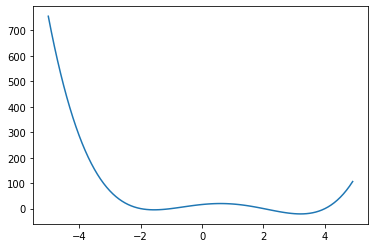

In [5]:
plotF(lambda x:(x+2)*(x+1)*(x-2)*(x-4))

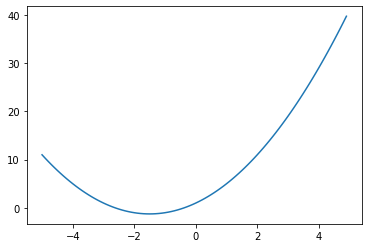

In [6]:
plotF(f_x)

In [ ]:
def f_x(x):
    return pow(x,2)+3*x+1

def df_dx(x):
    return 3*x+2

In [8]:
# draw
x=3
step=0
learning_rate=0.1
fig = plt.figure()
plotF(f_x)
plt.close()

while(step<50 and (abs(df_dx(x))>1e-6)) :
    x=x-learning_rate*df_dx(x)
    #print(x)
    #print(abs(f_x(x)))
    step+=1
    plt.figure()
    fm = plt.get_current_fig_manager()
    fm.canvas.figure = fig
    fig.canvas = fm.canvas
    #print('step: '+str(step))
    plt.plot(x,f_x(x),'o')
    plt.show()
    plt.close()
    clear_output(wait=True)

50


In [21]:
# property
x=3
step=0
learning_rate=0.1

while(step<500 and (abs(df_dx(x))>1e-6)) :
    x=x-learning_rate*df_dx(x)
    #print(x)
    if step%10==0:
        print(abs(f_x(x)))
        print(df_dx(x))
    step+=1
    # plt.figure()
    # fm = plt.get_current_fig_manager()
    # fm.canvas.figure = fig
    # fig.canvas = fm.canvas
    # #print('step: '+str(step))
    # plt.plot(x,f_x(x),'o')
    # plt.show()
    # plt.close()
    # clear_output(wait=True)
print(step)

10.309999999999999
7.699999999999999
0.4294623840735716
0.21750594173000026
0.5521380254093404
0.006144004504915923
0.5554591339197992
0.0001735529202382402
0.555552831974865
4.902440435827771e-06
46


In [17]:
def backtracking_line(f,df_dx,x,t):
    a=1/2
    b=1/2
    grad_f=df_dx(x)
    print('g '+str(grad_f))
    while f(x-t*grad_f)>f(x)-a*t*grad_f*grad_f:
        t=b*t
    print('t '+str(t))
    x=x-t*grad_f
    print('x '+str(x))
    return x,t

In [18]:
def f_x(x):
    return pow(x,2)+3*x+1

def df_dx(x):
    return 3*x+2

In [11]:
# draw

x=10
step=0
learning_rate=1
display=True
fig = plt.figure()
plotF(f_x)
plt.close()

while(step<50 and (abs(df_dx(x))>1e-6)) :
    #x=x-learning_rate*df_dx(x)
    x,learning_rate=backtracking_line(f_x,df_dx,x,learning_rate)
    #print(x)
    #print(abs(f_x(x)))
    step+=1
    
    if display:
        plt.figure()
        fm = plt.get_current_fig_manager()
        fm.canvas.figure = fig
        fig.canvas = fm.canvas
        #print('step: '+str(step))
        plt.plot(x,f_x(x),'o')
        plt.show()
        plt.close()
        clear_output(wait=True)
print(step)

50


In [19]:
# property
x=10
step=0
learning_rate=1
display=False
fig = plt.figure()
plotF(f_x)
plt.close()

while(step<50 and (abs(df_dx(x))>1e-6)) :
    #x=x-learning_rate*df_dx(x)
    x,learning_rate=backtracking_line(f_x,df_dx,x,learning_rate)
    #print(x)
    #print(abs(f_x(x)))
    step+=1
    
    if display:
        plt.figure()
        fm = plt.get_current_fig_manager()
        fm.canvas.figure = fig
        fig.canvas = fm.canvas
        #print('step: '+str(step))
        plt.plot(x,f_x(x),'o')
        plt.show()
        plt.close()
        clear_output(wait=True)
print(step)

g 32
t 0.125
x 6.0
g 20.0
t 0.125
x 3.5
g 12.5
t 0.125
x 1.9375
g 7.8125
t 0.125
x 0.9609375
g 4.8828125
t 0.125
x 0.3505859375
g 3.0517578125
t 0.125
x -0.0308837890625
g 1.9073486328125
t 0.125
x -0.2693023681640625
g 1.1920928955078125
t 0.125
x -0.41831398010253906
g 0.7450580596923828
t 0.125
x -0.5114462375640869
g 0.46566128730773926
t 0.125
x -0.5696538984775543
g 0.29103830456733704
t 0.125
x -0.6060336865484715
g 0.18189894035458565
t 0.125
x -0.6287710540927947
g 0.11368683772161603
t 0.125
x -0.6429819088079967
g 0.07105427357601002
t 0.125
x -0.6518636930049979
g 0.04440892098500626
t 0.125
x -0.6574148081281237
g 0.027755575615628914
t 0.125
x -0.6608842550800773
g 0.01734723475976807
t 0.125
x -0.6630526594250483
g 0.010842021724855044
t 0.125
x -0.6644079121406552
g 0.006776263578034403
t 0.125
x -0.6652549450879095
g 0.004235164736271502
t 0.125
x -0.6657843406799434
g 0.002646977960169661
t 0.125
x -0.6661152129249646
g 0.0016543612251063156
t 0.125
x -0.6663220080781